# Ejemplo 1. Diseño de Filtro Pasa-Bajos por el Método del Enventanado.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp

![imagen](cuadro.png)

- Frecuencia de muestreo de 10 kHz
- Frecuencia de corte de 2.5 kHz
- Rizado de 0.3% permitido
- Ancho de banda de transición de 200 Hz

In [2]:
Fs = 10e3
Fc = 2.5e3
fm = 200

Lo primero es calcular el rizado permitido en decibeles

In [3]:
ripple_dB = 20 * np.log10(0.3/100)
ripple_dB

-50.45757490560675

Según el resultado, debemos usar una ventana de Hamming o de Blackman para diseñar el filtro.

Para las cuatro ventanas del cuadro anterior se tiene la siguiente relación para M:

![imagen](ventanas.png)

In [4]:
M = 4*Fs/fm # Número de muestras ventana de Hamming
if (M%2 == 0): # Si M no es impar, la hace impar
    M = M+1
M = int(M) # M debe ser entero
wc = 2*np.pi*Fc/Fs # frecuencia de corte normalizada en radianes
n = np.arange(-M//2+1, M//2+1) # Vector de muestras
hi = wc/np.pi * np.sinc(wc*n/np.pi) # Respuesta del filtro ideal
win = 0.54-0.46*np.cos(2*np.pi*np.arange(len(n))/(M-1)) # Ventana de Hamming
h_n = hi*win # Multiplico la respuesta ideal por la ventana
w, h = sp.freqz(h_n, 1, whole=True, worN=2048) # Respuesta en frecuencia del filtro enventanado
print("Orden del filtro: ", M)

Orden del filtro:  201


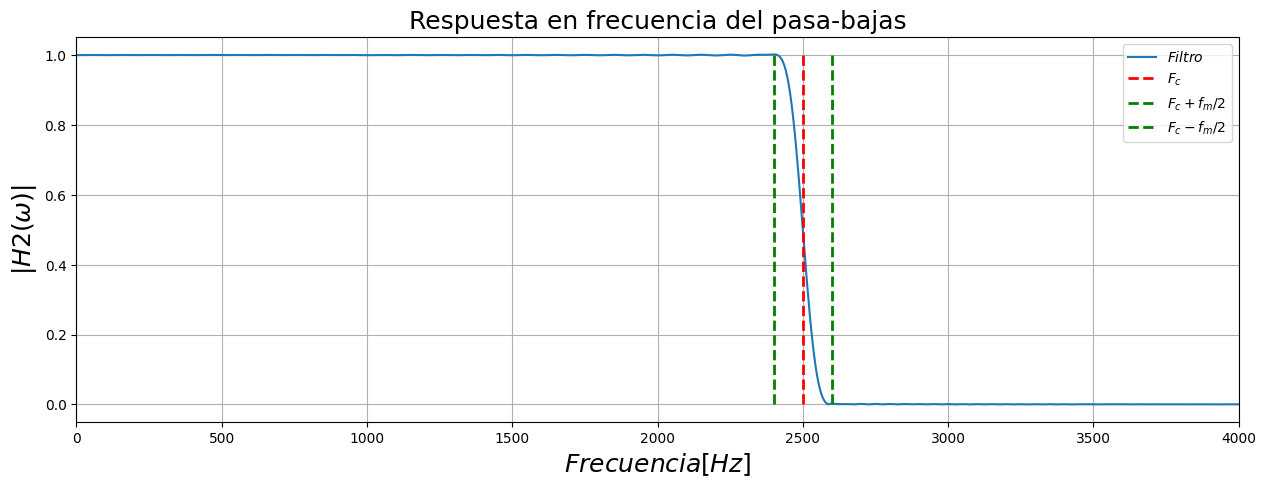

In [5]:
# Grafica
plt.figure(figsize=(15,5))
plt.title('Respuesta en frecuencia del pasa-bajas', fontsize=18)
plt.plot((w-np.pi)*Fs/(2*np.pi),np.abs(np.fft.fftshift(h)), label='$Filtro$')
plt.vlines(Fc, 0, 1, color='r', lw=2, linestyle='--', label='$F_c$')
plt.vlines(Fc+fm/2, 0, 1, color='g', lw=2, linestyle='--', label='$F_c+f_m/2$')
plt.vlines(Fc-fm/2, 0, 1, color='g', lw=2, linestyle='--', label='$F_c-f_m/2$')
plt.xlabel('$Frecuencia [Hz]$', fontsize=18)
plt.ylabel('$|H2(\omega)|$', fontsize=18)
plt.xlim([0, 4000])
plt.legend()
plt.grid()
plt.show()